# Unemployment Rate for Hispanic Population

### Import numpy, pandas, dataframe 

In [30]:
import pandas as pd
from pandas import DataFrame
import requests
import csv
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


### This API data extract from the Federal Reserve System contains the percentage of Hispanic or Latino unemployment in the US from 1973 to 2020.

In [8]:
r = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=LNS14000009&api_key=cc32522c021053498fbe94f21fd3eb17&file_type=json')
x = r.json()
df_HispUnempl = pd.DataFrame(x['observations'])
df_HispUnempl

,realtime_start,realtime_end,date,value
0,2020-12-20,2020-12-20,1973-03-01,7.3
1,2020-12-20,2020-12-20,1973-04-01,7.9
2,2020-12-20,2020-12-20,1973-05-01,8.1
3,2020-12-20,2020-12-20,1973-06-01,7.9
4,2020-12-20,2020-12-20,1973-07-01,7.2
...,...,...,...,...
568,2020-12-20,2020-12-20,2020-07-01,12.9
569,2020-12-20,2020-12-20,2020-08-01,10.5
570,2020-12-20,2020-12-20,2020-09-01,10.3
571,2020-12-20,2020-12-20,2020-10-01,8.8


### Check for missing values

In [9]:
df_HispUnempl.isnull().sum()

realtime_start    0
realtime_end      0
date              0
value             0
dtype: int64

In [10]:
df_HispUnempl.isnull().values.any()

False

### Convert column date to time value 

In [11]:
df_HispUnempl['date'] = df_HispUnempl['date'].astype('datetime64[ns]')

In [12]:
df_HispUnempl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  573 non-null    object        
 1   realtime_end    573 non-null    object        
 2   date            573 non-null    datetime64[ns]
 3   value           573 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 18.0+ KB


### Drop unnecessary columns

In [13]:
df_HispUnempl.drop(['realtime_end','realtime_start'],axis=1)

,date,value
0,1973-03-01,7.3
1,1973-04-01,7.9
2,1973-05-01,8.1
3,1973-06-01,7.9
4,1973-07-01,7.2
...,...,...
568,2020-07-01,12.9
569,2020-08-01,10.5
570,2020-09-01,10.3
571,2020-10-01,8.8


### After obtaining the Hispanic or Latino population in the US, access the www2.census.gov website to get data about Hispanic population in the US

In [14]:
data=pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/asrh/nc-est2019-alldata-c-file01.csv")
for i in range (2,19):
    File=str(i)
    data2 = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/asrh/nc-est2019-alldata-c-file" + File.zfill(2) + ".csv")
    data=data.append([data2], ignore_index=True)
    
#Clean data - eliminating data by age and getting only the totals 
Clean_AGE=(data['AGE']==999)
Clean_data2 = data[Clean_AGE]

#Month 4.1 is an estimate, then, it has to be eliminated
Clean_month2=(Clean_data2['MONTH'] != 4.1)
Clean_month=Clean_data2[Clean_month2]
Clean_month

,UNIVERSE,MONTH,YEAR,AGE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
102,C,4.2,2010,999,307528001,150745782,156782219,118894102,122127046,19053646,...,23198562,22531437,1423060,1497524,1080440,1010705,437149,441837,158075,152338
204,C,5.0,2010,999,307708263,150837173,156871090,118941089,122171164,19070825,...,23234658,22572909,1426541,1500887,1082258,1012495,438103,442784,158366,152610
306,C,6.0,2010,999,307890277,150929529,156960748,118988795,122215140,19087998,...,23271950,22615004,1429923,1504238,1084233,1014474,439057,443741,158680,152893
408,C,7.0,2010,999,308086427,151027905,157058522,119041643,122266055,19105504,...,23310135,22658056,1433470,1507611,1086247,1016487,440103,444689,159040,153196
510,C,8.0,2010,999,308308214,151142614,157165600,119104504,122321362,19125988,...,23349359,22704125,1436346,1511039,1087271,1018121,440751,445599,158936,153344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10302,C,8.0,2018,999,325663437,159979624,165683813,123195899,125966701,20812527,...,27225108,26758096,1825114,1889774,1278396,1211201,543201,546544,191581,184609
10404,C,9.0,2018,999,325824731,160060360,165764371,123232288,126001599,20828811,...,27261924,26795566,1828774,1893415,1280299,1213107,544249,547614,191898,184934
10506,C,10.0,2018,999,325983608,160139888,165843720,123267878,126035752,20844883,...,27298328,26832643,1832421,1896954,1282197,1215021,545339,548645,192240,185258
10608,C,11.0,2018,999,326123404,160209549,165913855,123295777,126062718,20859623,...,27333317,26868410,1835979,1900454,1284012,1216851,546340,549642,192572,185570


### Clean the data to get the total Hispanic population 

In [15]:
pd.options.mode.chained_assignment = None
Hispanic_Population = Clean_month[['MONTH','YEAR','H_MALE','H_FEMALE']]
Hispanic_Population['Total']=Hispanic_Population['H_MALE'] + Hispanic_Population['H_FEMALE']
Hispanic_Population['Str_Month']=Hispanic_Population['MONTH'].map(str)
Hispanic_Population['Str_Month']=Hispanic_Population['Str_Month'].str.split('.').str[0]
Hispanic_Population['Str_Month'] = Hispanic_Population['Str_Month'].str.zfill(2)
Hispanic_Population['Str_Year']=Hispanic_Population['YEAR'].map(str)
Hispanic_Population['Date']=Hispanic_Population['Str_Year']+'-'+Hispanic_Population['Str_Month']+'-'+'01'


#Drop unnecessary columns
Hispanic_Population.drop(['MONTH','YEAR','H_MALE','H_FEMALE','Str_Month','Str_Year'],axis=1)
Hispanic_Population['Date'] = Hispanic_Population['Date'].astype('datetime64[ns]')

### Filter the unemployment dates to match the population dates

In [16]:
unemployment_df = df_HispUnempl.loc[(df_HispUnempl.date >= '2010-04-01') & (df_HispUnempl.date <= '2020-12-01') ]

### Normalize data from file 1

#### Create x, where x are the value colum with values as floats

In [17]:
x = unemployment_df[['value']].values.astype(float)

##### Create a minimum and maximum processor object

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()

##### Create an object to transform the data to fit minmax processor

In [19]:
x_scaled = min_max_scaler.fit_transform(x)

##### Run the normalizer on the dataframe

In [20]:
nm_unemployment = pd.DataFrame(x_scaled)

### Normalize data from file 2

#### Create x, where x are the value colum with values as floats

In [21]:
x1 = Hispanic_Population[['Total']].values.astype(float)

#### Create a minimum and maximum processor object

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()

#### Create an object to transform the data to fit minmax processor

In [23]:
x_scaled = min_max_scaler.fit_transform(x1)

#### Run the normalizer on the dataframe

In [24]:
nm_Hispanic_Population = pd.DataFrame(x_scaled)

### Graphic of the normalized data

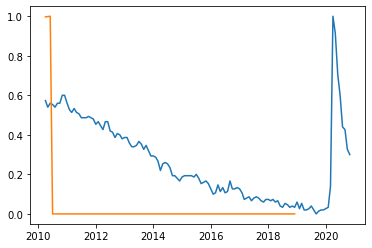

In [25]:
plt.plot(unemployment_df.date, nm_unemployment)
plt.plot(Hispanic_Population.Date,nm_Hispanic_Population)
plt.show()

### Calculating the correlation

In [26]:
population_unemployment_df1 = nm_unemployment
population_unemployment_df1 ['Population']=nm_Hispanic_Population
population_unemployment_df1.rename(columns={0: 'Unemployment'}, inplace=True)


coefficient_of_correlation = population_unemployment_df1.corr(method='pearson')
coefficient_of_correlation

,Unemployment,Population
Unemployment,1.000000,0.279017
Population,0.279017,1.000000
